# Úkol č. 3 - Segmentace zákazníků e-shopu
**Deadline úkolu je uveden na [course pages](https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html).**

Jednou z důležitých aplikací shlukování je **segmentace zákazníků** (angl. **customer segmentation**). 

Předpokládejme, že máme následující obchodní údaje o prodejích (resp. nákupech z pohledu zákazníků):
TransactionID - ID nákupu,
CustomerID - ID zákazníka, 
Date - datum nákupu, 
Total - celková cena nákupu.

Chceme najít segmenty zákazníků, kteří se chovají podobně. K tomu je dobré informace z jednotlivých nákupů pro individuální zákazníky agregovat. Tj. získat pro každého zákazníka jeden řádek.

Populárním přístupem je **RFM**, což znamená:

- **R**ecency: Počet dnů od posledního nákupu (poslední datum v datasetu pro daného zákazníka).
- **F**requency: Počet nákupů. Občas se vynechávají zákazníci s jediným nákupem. Pro jednoduchost je zde ale necháme.
- **M**onetary: Celková suma, kterou daný zákazník utratil.

## Zdroj dat
Budeme pracovat s daty z jednoho (skoro) vymyšleného eshopu, která jsou v přiloženém souboru `eshop.csv`.

## Pokyny k vypracování

Ve všech bodech zadání uvažujte aktuální datum jako datum poslední transakce (19. 12. 2015), nikoliv dnešek. Tváříme se, že jde o aktuální data.

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **8 bodů**:
- Vytvořte `rfm` data frame, kde každý řádek odpovídá jednomu zákazníkovi a sloupce (příznaky) jsou uvedené výše.
- Pomocí algoritmu `K-means` proveďte shlukování. Nějakým způsobem také odhadněte nejlepší počet shluků (podrobně vysvětlete).
- Zabývejte se vlivem přeškálování dat (standardizace příznaků). Tj. určete, zda je přeškálování vhodné, a proveďte ho.
- Interpretujte jednotlivé shluky. Použijte získané shluky k odlišení "superstar" zákazníků (vysoká monetary, vysoká frequency a nízká recency) od nezajímavých  zákazníků (vysoká recency, nízká frequency, nízká monetary).

**Další body zadání** za případné další body  (můžete si vybrat, maximum bodů za úkol je každopádně 12 bodů):
- (až +4 body) Proveďte analýzu vytvořených shluků pomocí metody silhouette (https://en.wikipedia.org/wiki/Silhouette_(clustering)).
- (až +4 body) Zkuste provést to samé s modifikovanou verzí **RFM**, kde Recency = "maximum počtu měsíců od posledního nákupu a čísla 1", Frequency = "maximum počtu nákupů daného zákazníka v posledních 12 měsících a čísla 1", Monetary = "Nejvyšší hodnota nákupu daného zákazníka". Porovnejte s původním přístupem.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Odevzdejte Jupyter Notebook.
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

In [1]:
import pandas as pd
df = pd.read_csv('eshop.csv')
df.head()

,Customer ID,Date,Subtotal,Country
0,34,6/21/2007,86.0,Czech Republic
1,38,6/27/2007,38.4,Czech Republic
2,47,7/2/2007,53.5,Slovakia
3,61,7/14/2007,7.0,Czech Republic
4,78,7/21/2007,55.5,Czech Republic


In [2]:
from datetime import timedelta
df['Date'] = pd.to_datetime(df['Date'])#, format='%Y/%m/%d')#, errors='ignore')
day = df['Date'].max()+timedelta(days=2)
day

Timestamp('2015-12-21 00:00:00')

In [3]:
##create RFM 

In [3]:
import numpy as np
RFM = pd.DataFrame({'id':df['Customer ID'].drop_duplicates()})
RFM['last_date'] = np.nan
RFM['count_of_buy'] = np.nan
RFM['money'] = np.nan
len(RFM)

12829

In [51]:
(day - pd.to_datetime(df['Date'].where(df['Customer ID']==RFM.iloc[13,0]).dropna().max())).days

2295

In [52]:
for i in range(0,len(RFM)):
    #a = str(day - pd.to_datetime(df['Date'].where(df['Customer ID']==RFM.iloc[i,0]).dropna().max()))
    RFM.iloc[i,1]=(day - pd.to_datetime(df['Date'].where(df['Customer ID']==RFM.iloc[i,0]).dropna().max())).days
    RFM.iloc[i,2]=df['Date'].where(df['Customer ID']==RFM.iloc[i,0]).dropna().count()
    RFM.iloc[i,3]=df['Subtotal'].where(df['Customer ID']==RFM.iloc[i,0]).dropna().sum()

In [53]:
print(RFM)

          id  last_date  count_of_buy   money
0         34     3105.0           1.0   86.00
1         38     3099.0           1.0   38.40
2         47     3094.0           1.0   53.50
3         61     3082.0           1.0    7.00
4         78     3075.0           1.0   55.50
...      ...        ...           ...     ...
22403  15356        3.0           1.0   31.87
22404  15357        3.0           1.0    6.10
22405  15358        3.0           1.0  153.23
22406  15359        2.0           1.0   19.15
22407  15360        2.0           1.0  139.10

[12829 rows x 4 columns]


In [7]:
#shlukování

In [54]:

import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [55]:
models = []
for i in range(2,13):
    models.append(KMeans(n_clusters=i))
    models[i-2].fit(RFM[['last_date', 'count_of_buy','money']])

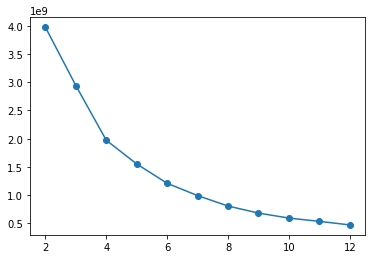

In [104]:
arrr = []
for i in range(0,len(models)):
    arrr.append(pd.Series({'iter':models[i].inertia_,'klastery':i+2}))
df_resr=pd.DataFrame(arrr)
plt.plot(df_resr['klastery'], df_resr['iter'],'o-')
plt.show()

In [69]:
![title](22.jpg)
#bereme mezi 3 a 5 

/bin/bash: -c: line 0: syntax error near unexpected token `22.jpg'
/bin/bash: -c: line 0: `[title](22.jpg)'


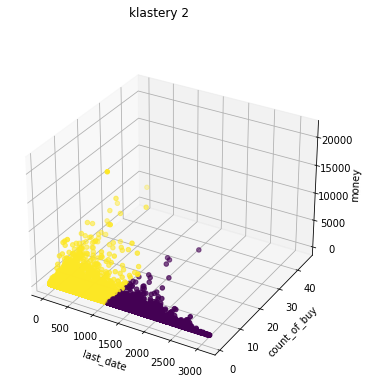

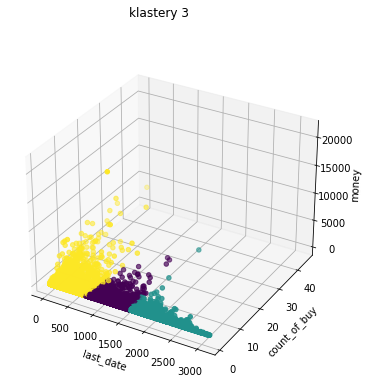

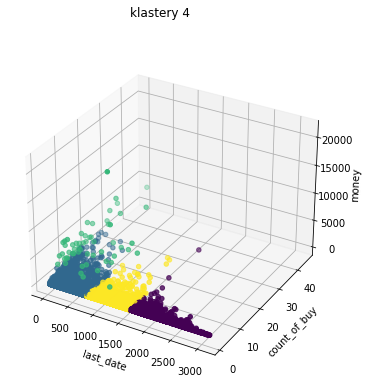

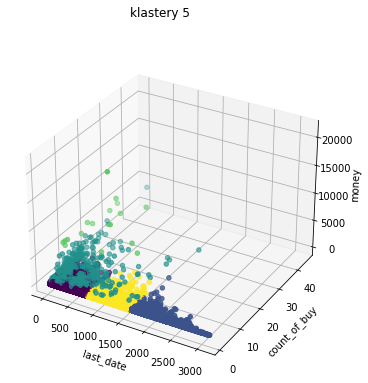

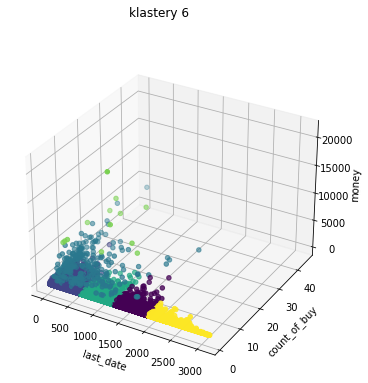

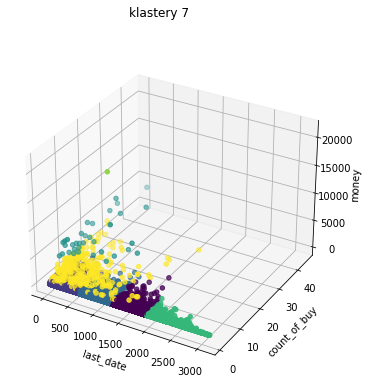

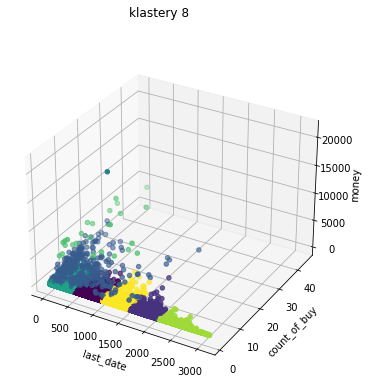

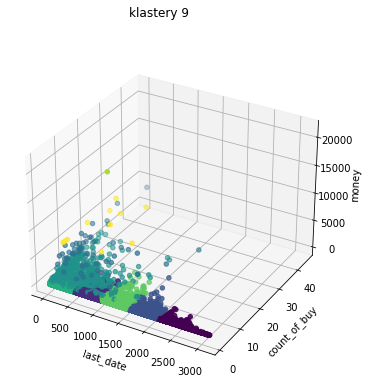

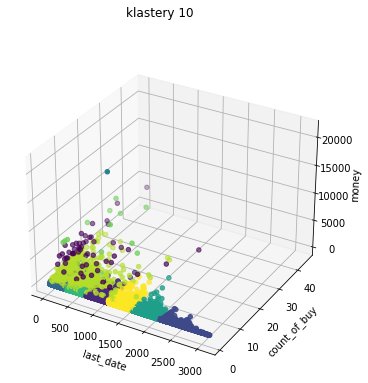

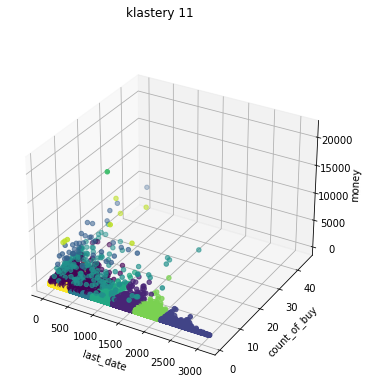

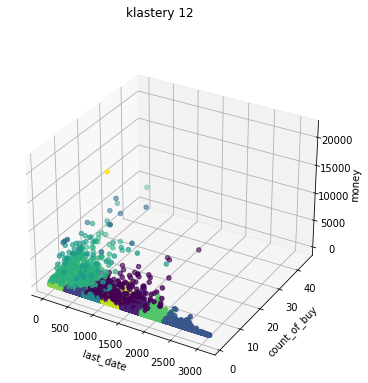

In [71]:
for i in range(0,len(models)):
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(RFM['last_date'],RFM['count_of_buy'], RFM['money'], c=models[i].labels_)
    ax.set_xlabel('last_date')
    ax.set_ylabel('count_of_buy')
    ax.set_zlabel('money')
    fig.suptitle('klastery {}'.format(i+2))

In [11]:
#pro 4 klastery nemame dukezitou skupinu ktera ma zelenou barvu na grafu pro 5 klasteru 
#pro 6 klastery mame novou skupinu ktera se nezajima nas
#5 klasteru nas vyber

In [72]:
vyber = 5
RFM_res = RFM
RFM_res['klaster'] = models[vyber-2].labels_

In [73]:
set(models[vyber-2].labels_)

{0, 1, 2, 3, 4}

In [74]:
RFM_res

,id,last_date,count_of_buy,money,klaster
0,34,3105.0,1.0,86.00,1
1,38,3099.0,1.0,38.40,1
2,47,3094.0,1.0,53.50,1
3,61,3082.0,1.0,7.00,1
4,78,3075.0,1.0,55.50,1
...,...,...,...,...,...
22403,15356,3.0,1.0,31.87,0
22404,15357,3.0,1.0,6.10,0
22405,15358,3.0,1.0,153.23,0
22406,15359,2.0,1.0,19.15,0


In [15]:
#normalizace dat

In [75]:
from sklearn.preprocessing import MinMaxScaler

#rfm_modifed = RFM_res[['last_date','count_of_buy','money']].copy()
rfm_modified = pd.DataFrame(MinMaxScaler().fit_transform(RFM[['last_date', 'count_of_buy', 'money']]),columns=['last_date', 'count_of_buy', 'money'])

rfm_modified

,last_date,count_of_buy,money
0,1.000000,0.0,0.003965
1,0.998066,0.0,0.001740
2,0.996455,0.0,0.002446
3,0.992588,0.0,0.000272
4,0.990332,0.0,0.002539
...,...,...,...
12824,0.000322,0.0,0.001435
12825,0.000322,0.0,0.000230
12826,0.000322,0.0,0.007108
12827,0.000000,0.0,0.000840


In [80]:
models_modified = []
for i in range(2,10):
    models_modified.append(KMeans(n_clusters=i))
    models_modified[i-2].fit(rfm_modified[['last_date', 'count_of_buy','money']])

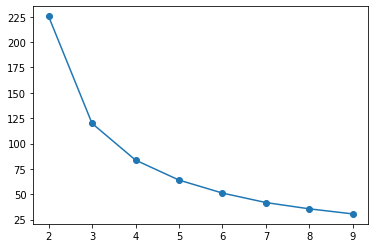

In [105]:
arr_modified = []
for i in range(0,len(models_modified)):
    arr_modified.append(pd.Series({'iter':models_modified[i].inertia_,'klastery':i+2}))
df_resr_modified=pd.DataFrame(arr_modified)
plt.plot(df_resr_modified['klastery'], df_resr_modified['iter'],'o-')
plt.show()

In [ ]:
#bereme mezi 3 a 4 

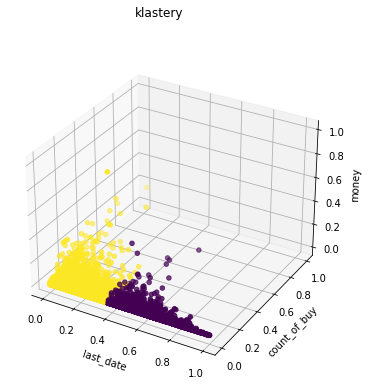

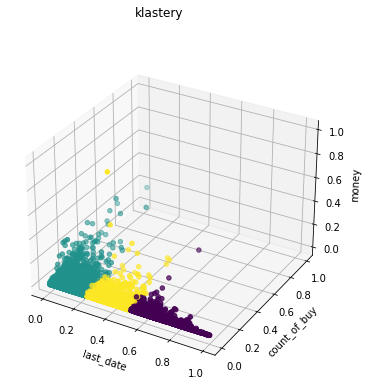

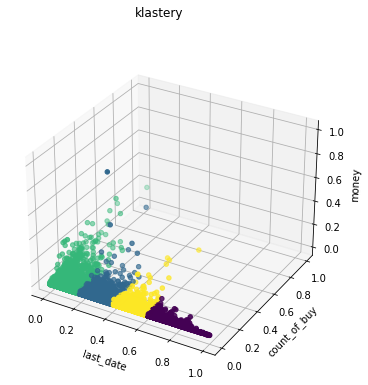

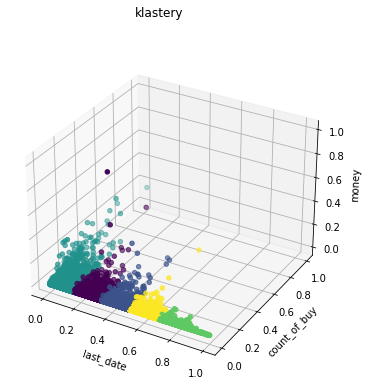

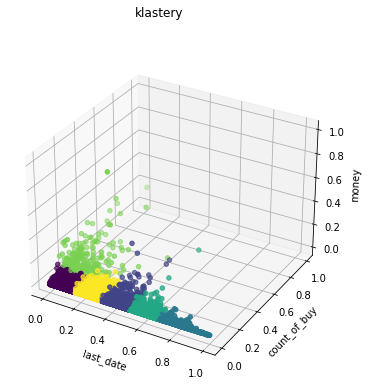

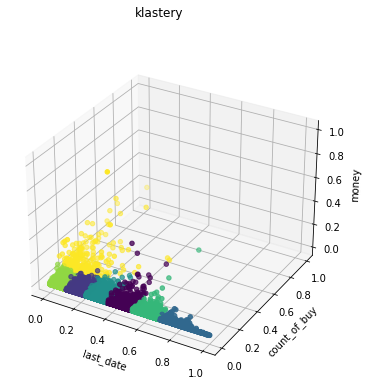

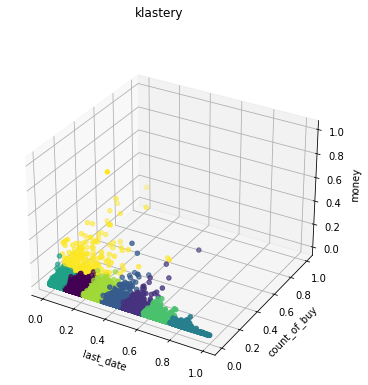

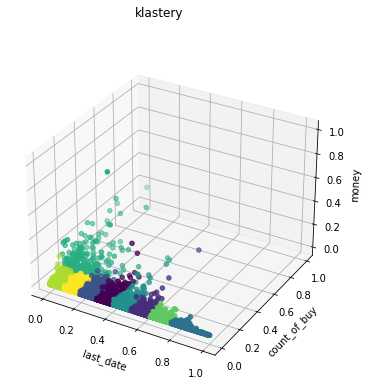

In [82]:
for i in range(0,len(models_modified)):
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(rfm_modified['last_date'],rfm_modified['count_of_buy'], rfm_modified['money'], c=models_modified[i].labels_)
    ax.set_xlabel('last_date')
    ax.set_ylabel('count_of_buy')
    
    ax.set_zlabel('money')
    fig.suptitle('klastery'.format(i+2))

In [83]:
#tady nejlepsi pro 6 klasteru
vyber = 4

In [84]:
rfm_modified['kluster']=models_modified[vyber-2].labels_
print(rfm_modified.groupby('kluster').mean())
print(RFM_res[['last_date','count_of_buy','money','klaster']].groupby('klaster').mean())


         last_date  count_of_buy     money
kluster                                   
0         0.731330      0.004669  0.003575
1         0.301746      0.014334  0.006972
2         0.087255      0.030785  0.011088
3         0.513390      0.010533  0.005046
           last_date  count_of_buy        money
klaster                                        
0         346.568684      1.818629   135.588468
1        2053.949667      1.275383    83.408412
2         394.694534      8.778135  1489.413119
3         444.764706     14.705882  7401.505294
4        1179.934968      1.505802   112.642452


In [85]:
#super star jsou skupiny 2 a 3
#skupina 0 take nevypada spatne 
#skupiny 1 a 4 nas vubec nezajimaji 

In [86]:
#rfm za 4 body 

In [87]:
RFM_b = pd.DataFrame({'id':df['Customer ID'].drop_duplicates()})
RFM_b['last_date'] = np.nan
RFM_b['count_of_buy'] = np.nan
RFM_b['money'] = np.nan
len(RFM)
"""(až +4 body) Zkuste provést to samé s modifikovanou verzí RFM,
kde Recency = "maximum počtu měsíců od posledního nákupu a čísla 1"
, Frequency = "maximum počtu nákupů daného zákazníka v posledních 12 měsícícha čísla 1", 
Monetary = "Nejvyšší hodnota nákupu daného zákazníka".
Porovnejte s původním přístupem.
"""

12829

In [89]:
for i in range(0,len(RFM_b)):
    #a = str(day - pd.to_datetime(df['Date'].where(df['Customer ID']==RFM_b.iloc[i,0]).dropna().max()))
    #RFM_b.iloc[i,1]=int(a.split()[0])/30
    a = int((day - pd.to_datetime(df['Date'].where(df['Customer ID']==RFM_b.iloc[i,0]).dropna().max())).days/30)
    if a == 0:
        a=1
    RFM_b.iloc[i,1] = a
    pop = df['Date'].where(df['Customer ID']==RFM_b.iloc[i,0]).dropna()
    kek = 0
    for j in range(0,len(pop)):
        a = str(day - pd.to_datetime(j))
        a = int(a.split()[0])/30
        if a < 12:
            kek=kek+1
    if kek==0:
        kek=1
    RFM_b.iloc[i,2]=kek
    RFM_b.iloc[i,3]=df['Subtotal'].where(df['Customer ID']==RFM_b.iloc[i,0]).dropna().max()

In [25]:
"""for i in range(0,1):
    #a = str(day - pd.to_datetime(df['Date'].where(df['Customer ID']==RFM_b.iloc[i,0]).dropna().max()))
    #RFM_b.iloc[i,1]=int(a.split()[0])/30
    pop = df['Date'].where(df['Customer ID']==RFM_b.iloc[i,0]).dropna()
    kek = 0
    for j in range(0,len(pop)):
        a = str(day - pd.to_datetime(j))
        a = int(a.split()[0])/30
        if a < 12:
        kek+=1    
    #RFM_b.iloc[i,2]=df['Date'].where(df['Customer ID']==RFM_b.iloc[i,0]).dropna().count()"""

"for i in range(0,1):\n    #a = str(day - pd.to_datetime(df['Date'].where(df['Customer ID']==RFM_b.iloc[i,0]).dropna().max()))\n    #RFM_b.iloc[i,1]=int(a.split()[0])/30\n    pop = df['Date'].where(df['Customer ID']==RFM_b.iloc[i,0]).dropna()\n    kek = 0\n    for j in range(0,len(pop)):\n        a = str(day - pd.to_datetime(j))\n        a = int(a.split()[0])/30\n        if a < 12:\n        kek+=1    \n    #RFM_b.iloc[i,2]=df['Date'].where(df['Customer ID']==RFM_b.iloc[i,0]).dropna().count()"

In [90]:
print(RFM_b)

          id  last_date  count_of_buy   money
0         34      103.0           1.0   86.00
1         38      103.0           1.0   38.40
2         47      103.0           1.0   53.50
3         61      102.0           1.0    7.00
4         78      102.0           1.0   55.50
...      ...        ...           ...     ...
22403  15356        1.0           1.0   31.87
22404  15357        1.0           1.0    6.10
22405  15358        1.0           1.0  153.23
22406  15359        1.0           1.0   19.15
22407  15360        1.0           1.0  139.10

[12829 rows x 4 columns]


In [91]:
models_b = []
for i in range(2,10):
    models_b.append(KMeans(n_clusters=i))
    models_b[i-2].fit(RFM_b[['last_date', 'count_of_buy','money']])

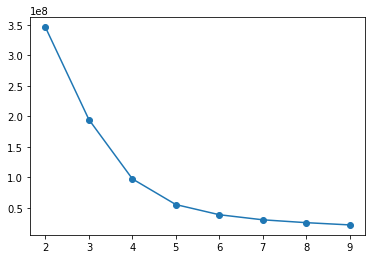

In [106]:
arr_modified_b = []
for i in range(0,len(models_b)):
    arr_modified_b.append(pd.Series({'iter':models_b[i].inertia_,'klastery':i+2}))
df_resr_modified_b=pd.DataFrame(arr_modified_b)
plt.plot(df_resr_modified_b['klastery'], df_resr_modified_b['iter'],'o-')
plt.show()

In [ ]:
#mezi 3 a 5 

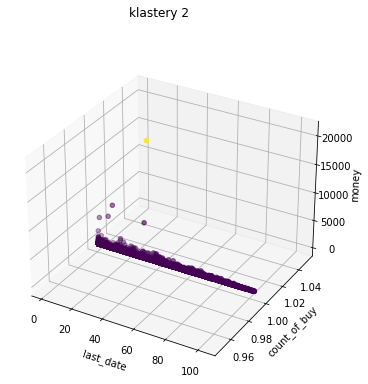

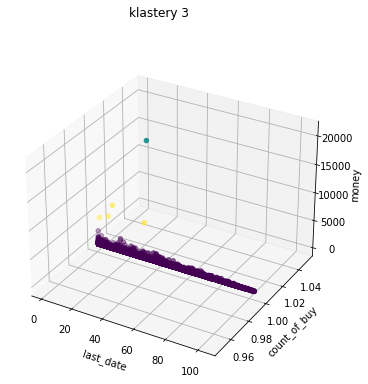

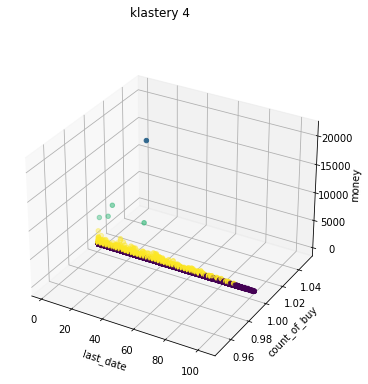

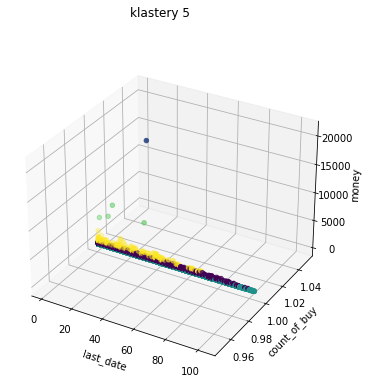

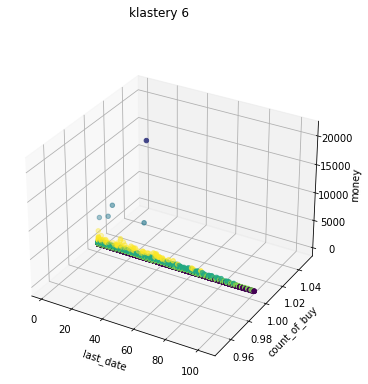

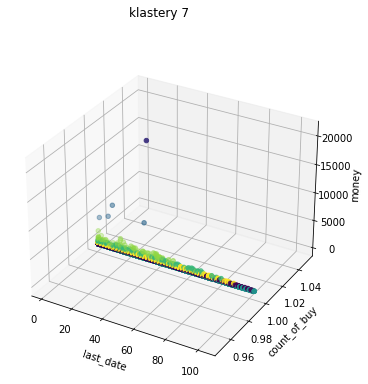

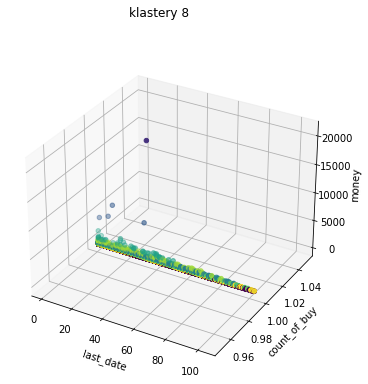

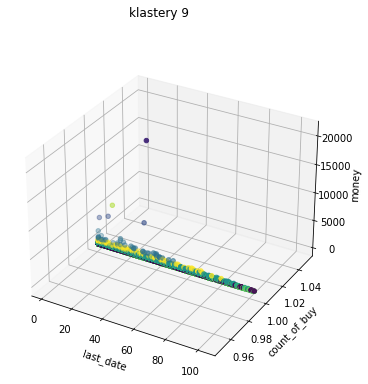

In [93]:
for i in range(0,len(models_b)):
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(RFM_b['last_date'],RFM_b['count_of_buy'], RFM_b['money'], c=models_b[i].labels_)
    ax.set_xlabel('last_date')
    ax.set_ylabel('count_of_buy')
    ax.set_zlabel('money')
    fig.suptitle('klastery {}'.format(i+2))

In [94]:
vyber = 4
RFM_res_b = RFM_b
RFM_res_b['klaster'] = models_b[vyber-2].labels_
RFM_res_b

,id,last_date,count_of_buy,money,klaster
0,34,103.0,1.0,86.00,0
1,38,103.0,1.0,38.40,0
2,47,103.0,1.0,53.50,0
3,61,102.0,1.0,7.00,0
4,78,102.0,1.0,55.50,0
...,...,...,...,...,...
22403,15356,1.0,1.0,31.87,0
22404,15357,1.0,1.0,6.10,0
22405,15358,1.0,1.0,153.23,0
22406,15359,1.0,1.0,19.15,0


In [95]:
print(RFM_res_b[['last_date','count_of_buy','money','klaster']].groupby('klaster').mean())

         last_date  count_of_buy         money
klaster                                       
0        36.978558           1.0     69.828401
1        34.000000           1.0  21001.050000
2        13.250000           1.0   6248.252500
3        26.489933           1.0    442.187396


In [98]:
rfm_modified = pd.DataFrame(MinMaxScaler().fit_transform(RFM_b[['last_date', 'count_of_buy', 'money']]),columns=['last_date', 'count_of_buy', 'money'])

rfm_modified

,last_date,count_of_buy,money
0,1.000000,0.0,0.004039
1,1.000000,0.0,0.001772
2,1.000000,0.0,0.002491
3,0.990196,0.0,0.000277
4,0.990196,0.0,0.002587
...,...,...,...
12824,0.000000,0.0,0.001461
12825,0.000000,0.0,0.000234
12826,0.000000,0.0,0.007241
12827,0.000000,0.0,0.000856


In [100]:
models_modified_b = []
for i in range(2,10):
    models_modified_b.append(KMeans(n_clusters=i))
    models_modified_b[i-2].fit(rfm_modified[['last_date', 'count_of_buy','money']])

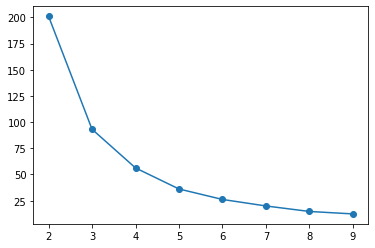

In [107]:
arr_modified_b_1 = []
for i in range(0,len(models_modified_b)):
    arr_modified_b_1.append(pd.Series({'iter':models_modified_b[i].inertia_,'klastery':i+2}))
df_resr_modified_b_1=pd.DataFrame(arr_modified_b_1)
plt.plot(df_resr_modified_b_1['klastery'], df_resr_modified_b_1['iter'],'o-')
plt.show()

In [ ]:
mezi 3 a 4 

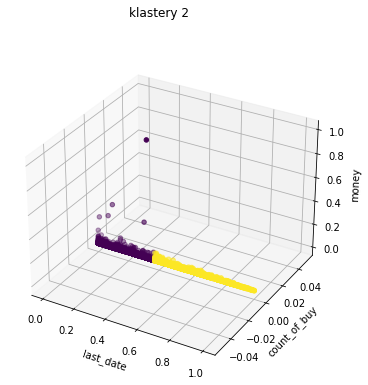

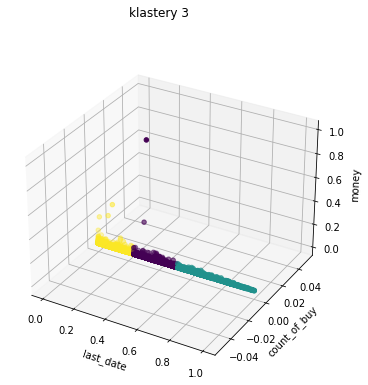

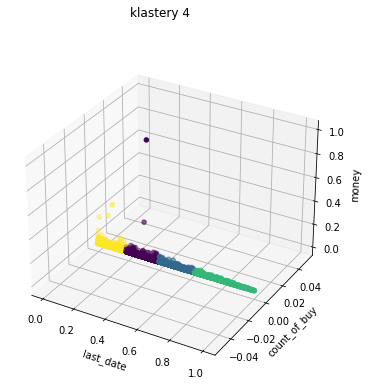

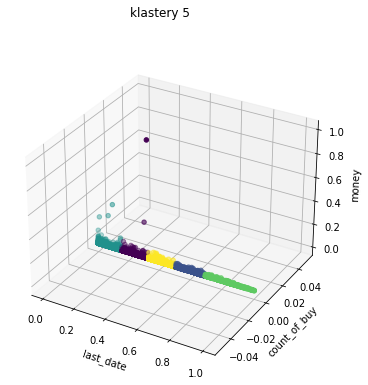

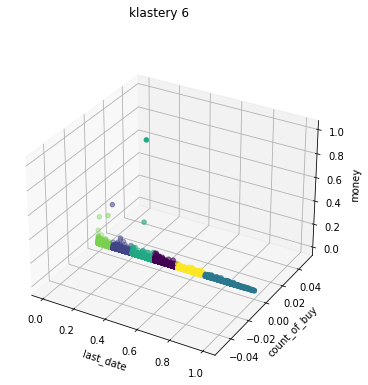

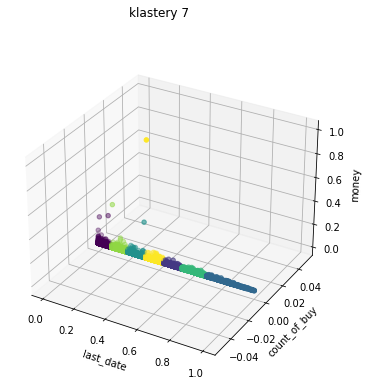

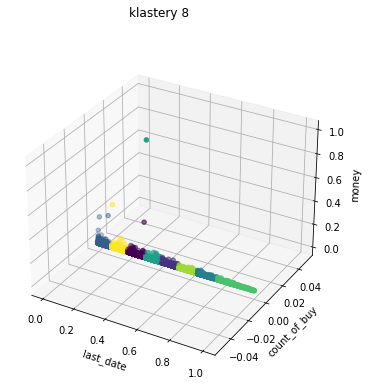

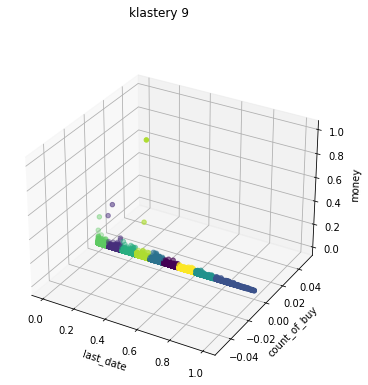

In [102]:
for i in range(0,len(models_modified_b)):
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(rfm_modified['last_date'],rfm_modified['count_of_buy'], rfm_modified['money'], c=models_modified_b[i].labels_)
    ax.set_xlabel('last_date')
    ax.set_ylabel('count_of_buy')
    ax.set_zlabel('money')
    fig.suptitle('klastery {}'.format(i+2))

In [34]:
#ted to vypada lepsi bereme 4 klasteru 


In [103]:
vyber = 4
rfm_modified['kluster']=models_modified_b[vyber-2].labels_
print(rfm_modified.groupby('kluster').mean())
print(RFM_res_b[['last_date','count_of_buy','money','klaster']].groupby('klaster').mean())

         last_date  count_of_buy     money
kluster                                   
0         0.290470           0.0  0.004759
1         0.507577           0.0  0.003763
2         0.731126           0.0  0.003074
3         0.074667           0.0  0.005483
         last_date  count_of_buy         money
klaster                                       
0        36.978558           1.0     69.828401
1        34.000000           1.0  21001.050000
2        13.250000           1.0   6248.252500
3        26.489933           1.0    442.187396
